In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [58]:
labels = ['pyramid', 'tetra','cow','cube']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [59]:
#Now we can easily fetch our train and validation data.
train = get_data(r'.\train')
val = get_data(r'.\test')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19716/3783788490.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'pyramid')

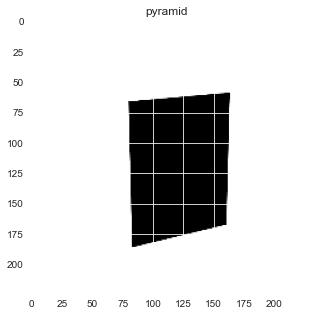

In [68]:
plt.figure(figsize = (5,5))
plt.imshow(train[3][0])
plt.title(labels[train[3][1]])

In [72]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)



In [82]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 64)      

In [83]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [84]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))


Epoch 1/50
7/7 [==============================] - 8s 1s/step - loss: 1.3819 - accuracy: 0.2700 - val_loss: 1.3817 - val_accuracy: 0.2400
Epoch 2/50
7/7 [==============================] - 7s 983ms/step - loss: 1.3785 - accuracy: 0.2650 - val_loss: 1.3775 - val_accuracy: 0.2150
Epoch 3/50
7/7 [==============================] - 7s 996ms/step - loss: 1.3827 - accuracy: 0.2600 - val_loss: 1.3736 - val_accuracy: 0.2550
Epoch 4/50
7/7 [==============================] - 7s 955ms/step - loss: 1.3831 - accuracy: 0.2950 - val_loss: 1.3703 - val_accuracy: 0.3400
Epoch 5/50
7/7 [==============================] - 7s 956ms/step - loss: 1.3672 - accuracy: 0.3250 - val_loss: 1.3668 - val_accuracy: 0.3950
Epoch 6/50
7/7 [==============================] - 7s 965ms/step - loss: 1.3918 - accuracy: 0.2500 - val_loss: 1.3633 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 6s 949ms/step - loss: 1.3698 - accuracy: 0.3100 - val_loss: 1.3600 - val_accuracy: 0.5500
Epoch 8/50
7/7 [=======

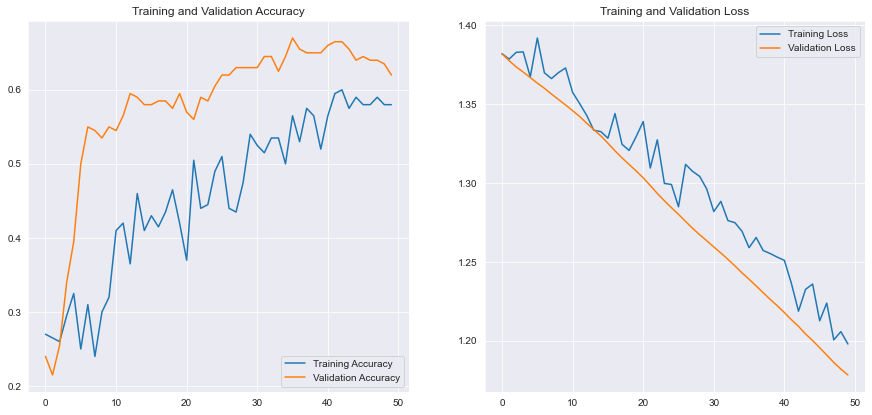

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)
predictions = classes_x.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['cow (Class 0)','cube (Class 1)']))


4/4 [==============================] - 1s 155ms/step
                precision    recall  f1-score   support

 cow (Class 0)       0.61      0.74      0.67        50
cube (Class 1)       0.67      0.52      0.58        50

      accuracy                           0.63       100
     macro avg       0.64      0.63      0.63       100
  weighted avg       0.64      0.63      0.63       100



In [2]:
import seaborn as sns
from sklearn import metrics

predict_x=model.predict(x_val) 
classes_x=np.argmax(predict_x,axis=1)
predictions = classes_x.reshape(1,-1)[0]

y_pred = predictions


NameError: name 'model' is not defined

In [87]:
# let's have a look at the errors
errors = (y_pred - y_val != 0)
error_pos = np.array(np.where(errors))
print('total number of errors:', len(error_pos[0,:]))

errl=[]
for i in range(100):
    if y_pred[i] - y_val[i] != 0:
        errl.append(i)


total number of errors: 76
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 90, 91, 93, 96, 97, 98]


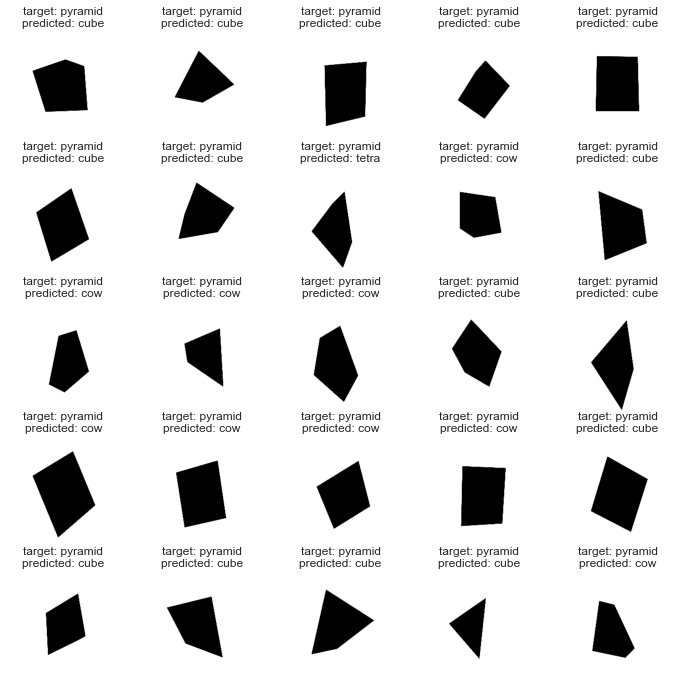

In [96]:
# show the errors
plt.figure(figsize=(12,12))
x, y =5,5
for i in range(25):
    plt.subplot(y, x,i+1)
    m=int(errl[i])
    plt.imshow(train[m][0])
    plt.title('target: {}\npredicted: {}'.format((labels[train[m][1]]),labels[y_pred[m]]))
    plt.axis('off')
plt.show()
    

7/7 [==============================] - 1s 195ms/step


[Text(0, 0.5, 'pyramid'),
 Text(0, 1.5, 'tetra'),
 Text(0, 2.5, 'cow'),
 Text(0, 3.5, 'cube')]

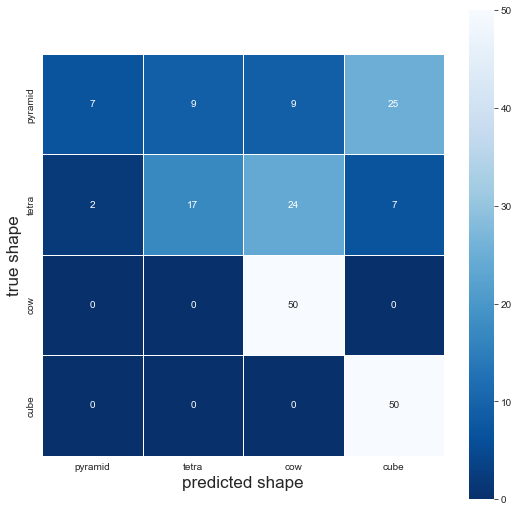

In [124]:
# confusion matrix
import seaborn as sns
from sklearn import metrics

predict_x = model.predict(x_val)
classes_x=np.argmax(predict_x,axis=1)
Y_pred = classes_x.reshape(1,-1)[0]
# convert one hot to vector

Y_test = y_val


cm1 = metrics.confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(9,9))
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
ax.set_ylabel('true shape', size=17)
ax.set_xlabel('predicted shape', size=17)
ax.xaxis.set_ticklabels(['pyramid', 'tetra','cow','cube']); ax.yaxis.set_ticklabels(['pyramid', 'tetra','cow','cube'])
